In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [9]:
#Generate synthetic dataset
X, y = make_moons(n_samples=700, noise=0.2, random_state=42)

In [10]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 5, 10, 100],
    'kernel': ['linear', 'rbf', 'poly']
}

In [12]:
# Grid search 
grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy') 
grid.fit(X_train, y_train) 
 
print('Best Parameters:', grid.best_params_) 
print('Best CV Accuracy:', grid.best_score_)

Best Parameters: {'C': 1, 'kernel': 'rbf'}
Best CV Accuracy: 0.9612244897959183


In [13]:
# Best model 
best_model = grid.best_estimator_ 
y_pred = best_model.predict(X_test) 
print('Test Accuracy:', accuracy_score(y_test, y_pred)) 

Test Accuracy: 0.9523809523809523


In [16]:
# Decision boundary plotting function 
def plot_decision_boundary(model, X, y): 
    h = 0.02 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) 
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)  

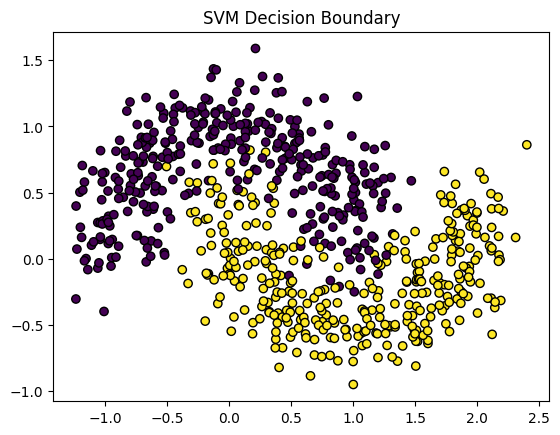

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o') 
plt.title('SVM Decision Boundary') 
plt.show()